In [5]:
from train_model import *

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
model_levels = [
    np.array(3 * ['env_1_sat_59'] + 3 * ['env_1_sat_25_59_115'] + 3 * ['env_1_5_sat_25_59_115']),
    np.array(3 * ['Bioclimatic variables','Satellite images','Bioclim + sat'])
]
#3 * ['env_1_sat_25']  +  3 * ['env_1_sat_115'] + 3 * ['env_1_5_9_17_sat_25_59_115']

In [10]:
models = {
    # '1_env_1': '0702_env_1',
    # '1_sat_25': '0704_sat_25',
    # '1_env_1_sat_25': '0701_env_1_sat_25',

    '2_env_1': '0702_env_1',
    '2_sat_59': '0704_sat_59', 
    '2_env_1_sat_59': '0703_env_1_sat_59',

    # '3_env_1': '0702_env_1',
    # '3_sat_115': '0704_sat_115',
    # '3_env_1_sat_115': '0703_env_1_sat_115',
    
    '4_env_1': '0702_env_1',
    '4_sat_25_59_115': '0704_sat_25_59_115',
    '4_env_1_sat_25_59_115': '0701_env_1_sat_25_59_115_v2',
    
    '5_env_1_5': '0702_env_1_5',
    '5_sat_25_59_115': '0704_sat_25_59_115',
    '5_env_1_5_sat_25_59_115': '0701_env_1_5_sat_25_59_115',

    # '6_env_1_5_9_17': '0702_env_1_5_9_17',
    # '6_sat_25_59_115': '0702_sat_25_59_115',
    # '6_env_1_5_9_17_sat_25_59_115': '0701_env_1_5_9_17_sat_25_59_115'
}

In [11]:
checkpoint =  'last' # 'best_val_auc' # 
auc_df = pd.concat([
    pd.read_csv(f"models/{v}/{checkpoint}_species_auc.csv").rename(columns={"auc": k}).set_index(['species','n_occ']) for k, v in models.items()
], axis=1)

# auc_df['env_25'] = pd.read_csv(f"models/0702_env_25/best_val_auc_species_auc.csv").rename(columns={"auc": 'env_25'}).set_index(['species','n_occ']) 
auc_df['2_sat_59'] = pd.read_csv(f"models/0704_sat_59/best_val_auc_species_auc.csv").rename(columns={"auc": 'sat_59'}).set_index(['species','n_occ']) 

auc_df.columns = model_levels
auc_df

env_1_sat_59                                 \
              Bioclimatic variables Satellite images Bioclim + sat   
species n_occ                                                        
1       2261               0.827572         0.846312      0.836225   
5       4529               0.546423         0.603756      0.657770   
10      2162               0.947397         0.934939      0.942661   
11      4508               0.704472         0.689381      0.714104   
24      4539               0.812850         0.667173      0.807319   
...                             ...              ...           ...   
10028   204                0.954360         0.926743      0.975476   
10031   20                 0.234100         0.872933      0.778540   
10035   110                0.402549         0.495983      0.419673   
10038   10                 0.978083         0.857066      0.986823   
10039   2944               0.777705         0.728509      0.788933   

                env_1_sat_25_59_115                                 \
              Bioclimatic variables Satellite images Bioclim + sat   
species n_occ                                                        
1       2261               0.827572         0.890159      0.861914   
5       4529               0.546423         0.634323      0.595155   
10      2162               0.947397         0.937441      0.922669   
11      4508               0.704472         0.659649      0.735990   
24      4539               0.812850         0.683435      0.830540   
...                             ...              ...           ...   
10028   204                0.954360         0.973055      0.939834   
10031   20                 0.234100         0.900901      0.657254   
10035   110                0.402549         0.470022      0.460868   
10038   10                 0.978083         0.845233      0.994890   
10039   2944               0.777705         0.700951      0.778694   

              env_1_5_sat_25_59_115                                 
              Bioclimatic variables Satellite images Bioclim + sat  
species n_occ                                                       
1       2261               0.841246         0.890159      0.865680  
5       4529               0.560585         0.634323      0.524573  
10      2162               0.922185         0.937441      0.910965  
11      4508               0.721606         0.659649      0.678441  
24      4539               0.832507         0.683435      0.809814  
...                             ...              ...           ...  
10028   204                0.991571         0.973055      0.926653  
10031   20                 0.733629         0.900901      0.746941  
10035   110                0.457361         0.470022      0.421871  
10038   10                 0.966519         0.845233      0.884228  
10039   2944               0.700994         0.700951      0.759259  

[2174 rows x 9 columns]

In [12]:
melt_df = pd.melt(auc_df.reset_index(), id_vars=['species','n_occ'], var_name=['model','modality'], value_name='AUC')
melt_df['AUC'] = melt_df['AUC'].round(3) * 100

melt_df

,species,n_occ,model,modality,AUC
0,1,2261,env_1_sat_59,Bioclimatic variables,82.8
1,5,4529,env_1_sat_59,Bioclimatic variables,54.6
2,10,2162,env_1_sat_59,Bioclimatic variables,94.7
3,11,4508,env_1_sat_59,Bioclimatic variables,70.4
4,24,4539,env_1_sat_59,Bioclimatic variables,81.3
...,...,...,...,...,...
19561,10028,204,env_1_5_sat_25_59_115,Bioclim + sat,92.7
19562,10031,20,env_1_5_sat_25_59_115,Bioclim + sat,74.7
19563,10035,110,env_1_5_sat_25_59_115,Bioclim + sat,42.2
19564,10038,10,env_1_5_sat_25_59_115,Bioclim + sat,88.4


In [13]:
f1_scores = []
for k, v in models.items():
    if v == '0704_sat_59':
        f1s = np.load(f"models/{v}/f1_scores_best_val_auc.npy") # last.npy") #
    else:
        f1s = np.load(f"models/{v}/f1_scores_last.npy") #best_val_auc.npy") #
    f1_scores.append(f1s[1,np.argwhere((f1s[0] < 0.52) & (f1s[0] > 0.48))][0][0].round(4) * 100)
    
test_f1_scores = [
    # 2.37, 1.69, 2.42,
    2.37, 1.98, 2.30,
    # 2.37, 2.00, 1.93,
    2.37, 2.25, 2.23,
    2.39, 2.25, 2.77,
    # 2.35, 2.25, 2.46
]

median_f1 = pd.DataFrame({'F1': f1_scores, 'test_F1': test_f1_scores}, index=model_levels).reset_index().rename(columns={'level_0':'model','level_1':'modality'})
median_f1

,model,modality,F1,test_F1
0,env_1_sat_59,Bioclimatic variables,3.05,2.37
1,env_1_sat_59,Satellite images,2.88,1.98
2,env_1_sat_59,Bioclim + sat,3.15,2.30
3,env_1_sat_25_59_115,Bioclimatic variables,3.05,2.37
4,env_1_sat_25_59_115,Satellite images,3.53,2.25
5,env_1_sat_25_59_115,Bioclim + sat,2.92,2.23
6,env_1_5_sat_25_59_115,Bioclimatic variables,3.13,2.39
7,env_1_5_sat_25_59_115,Satellite images,3.53,2.25
8,env_1_5_sat_25_59_115,Bioclim + sat,3.86,2.77


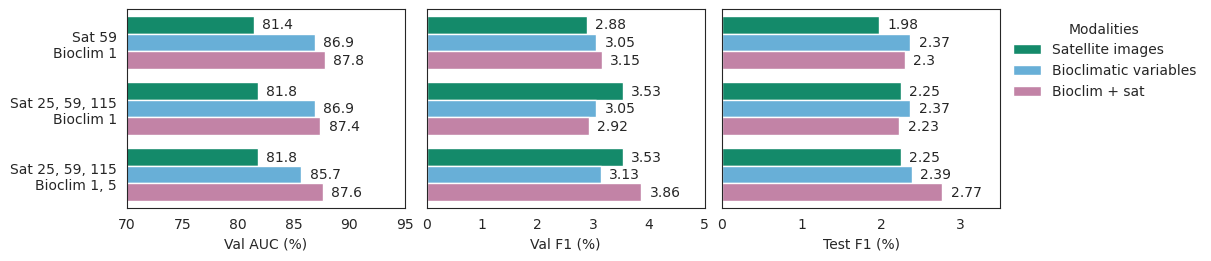

In [15]:
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,2.5), layout='constrained')

sns.barplot(melt_df, ax=ax1, y='model', x='AUC', hue='modality', hue_order=['Satellite images','Bioclimatic variables','Bioclim + sat'], estimator='median', errorbar=None, palette=['#009E73', '#56B4E9', '#CC79A7'])
ax1.bar_label(ax1.containers[0], fontsize=10, padding=6)
ax1.bar_label(ax1.containers[1], fontsize=10, padding=6)
ax1.bar_label(ax1.containers[2], fontsize=10, padding=6)
ax1.set(xlim=(70,95), yticklabels=['Sat 59\nBioclim 1', 'Sat 25, 59, 115\nBioclim 1','Sat 25, 59, 115\nBioclim 1, 5'], ylabel=None, xlabel='Val AUC (%)')
#'Sat 25\nBioclim 1', 'Sat 115\nBioclim 1', , 'Sat 25, 59, 115\nBioclim 1, 5, 9, 17'
# sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1), title='Modalities', frameon=False)
ax1.legend_.remove()

sns.barplot(median_f1, ax=ax2, y='model', x='F1', hue='modality', hue_order=['Satellite images','Bioclimatic variables','Bioclim + sat'], palette=['#009E73', '#56B4E9', '#CC79A7'])
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1), title='Modalities', frameon=False)
ax2.set(xlim=(0,5), yticklabels=[], ylabel=None, xlabel='Val F1 (%)')
ax2.bar_label(ax2.containers[0], fontsize=10, padding=6)
ax2.bar_label(ax2.containers[1], fontsize=10, padding=6)
ax2.bar_label(ax2.containers[2], fontsize=10, padding=6)
ax2.legend_.remove()

sns.barplot(median_f1, ax=ax3, y='model', x='test_F1', hue='modality', hue_order=['Satellite images','Bioclimatic variables','Bioclim + sat'], palette=['#009E73', '#56B4E9', '#CC79A7'])
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1), title='Modalities', frameon=False)
ax3.set(xlim=(0,3.5), yticklabels=[], ylabel=None, xlabel='Test F1 (%)')
ax3.bar_label(ax3.containers[0], fontsize=10, padding=6)
ax3.bar_label(ax3.containers[1], fontsize=10, padding=6)
ax3.bar_label(ax3.containers[2], fontsize=10, padding=6)

plt.savefig('figures/multimodal.pdf')